# American Options Payoffs

Unlike European Options, American options can be exercised at any time until maturity.

While calculating payoffs for American options, need to consider two things:
1. Payoff as per European-counterpart
2. Payoff from early exercise of the option

The max of the two values will be the final payoff for the American option at any time.

In [1]:
import numpy as np

Parameters
* S_ini - Initial Underlying value
* K - Strike
* T - Time to Maturity
* r - risk-free rate
* u - Upside movement
* d - downward movement
* N - Number of steps in Binomial Tree
* opttype - Type of Option (Call or Put)

The below defined function calculates price of the American option and the evolution of the underlying asset price.

In [2]:
def american_options(S_ini, K, T, r, u, d, N, opttype):
    dt = T/N # Time-step
    p = (np.exp(r * dt) - d) / (u - d) # Risk-neutral prob
    C = np.zeros([N+1, N+1]) # Option prices
    S = np.zeros([N+1, N+1]) # Underlying prices

    for i in range(N+1):
        S[N,i] = S_ini * (u ** i) * (d ** (N-i))
        if opttype == "C":
            C[N,i] = max(S_ini * (u ** i) * (d ** (N-i))- K, 0)
        else:
            C[N,i] = max(K - S_ini * (u ** i) * (d ** (N-i)), 0)
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            S[j,i] = S_ini * (u ** i) * (d ** (j-i))
            C[j,i] = np.exp(-r * dt) * (
                p * C[j+1,i+1] + (1-p) * C[j+1,i]
            ) # Compute european option prices
            if opttype == "C":
                C[j,i] = max(
                    C[j,i],
                    S[j,i] - K
                ) # decide between early exercise payoff and european option price
            else:
                C[j,i] = max(
                    C[j,i],
                    K - S[j,i]
                )
    return C[0,0], C, S

Let's check the option price for an American call option with $S_0 = 100, K = 90, u=1.2, d=0.8,$ r=10%, $T=N=5$

In [3]:
option_price, C, S = american_options(100, 90, 5, 0.1, 1.2, 0.8, 5, "C")

The price of the call option is:

In [4]:
option_price

46.50220504318682

In [17]:
# Evolution of underlying price
S

array([[ 45.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ 37.4985    ,  54.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ 31.24750005,  44.9982    ,  64.8       ,   0.        ,
          0.        ,   0.        ],
       [ 26.03854179,  37.49700006,  53.99784   ,  77.76      ,
          0.        ,   0.        ],
       [ 21.69791687,  31.24625015,  44.99640007,  64.797408  ,
         93.312     ,   0.        ],
       [ 18.08087413,  26.03750025,  37.49550018,  53.99568009,
         77.7568896 , 111.9744    ]])

# Matching Volatility in the American Options

Evolution of the underlying's price in above defined function doesn't considers the asset's volatility. So let's now match volatility in the pricing of the options.

In [7]:
def american_option_vols(S_ini, K, T, r, sigma, N, opttype):
    dt = T/N # Time-step
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d) # Risk-neutral prob
    C = np.zeros([N+1, N+1]) # Option prices
    S = np.zeros([N+1, N+1]) # Underlying prices

    for i in range(N+1):
        S[N,i] = S_ini * (u ** i) * (d ** (N-i))
        if opttype == "C":
            C[N,i] = max(S_ini * (u ** i) * (d ** (N-i))- K, 0)
        else:
            C[N,i] = max(K - S_ini * (u ** i) * (d ** (N-i)), 0)
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            S[j,i] = S_ini * (u ** i) * (d ** (j-i))
            C[j,i] = np.exp(-r * dt) * (
                p * C[j+1,i+1] + (1-p) * C[j+1,i]
            ) # Compute european option prices
            if opttype == "C":
                C[j,i] = max(
                    C[j,i],
                    S[j,i] - K
                ) # decide between early exercise payoff and european option price
            else:
                C[j,i] = max(
                    C[j,i],
                    K - S[j,i]
                )
    return C[0,0], C, S

Now, let's check the price of an American call with $K=90, So=100, T=N=10, \sigma=0.3, r=0$

In [8]:
price, C, S = american_option_vols(100, 90, 10, 0, 0.3, 10, "C")
price

39.899240766330934

Let's see what impact does the number of steps in the binomial tree have on the price of the options.
Below we run the function for different values of N.

In [9]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    call_price, C, S = american_option_vols(100, 90, 1, 0, 0.3, N, "C")
    price_array.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 19.14
With N =  10, the price is 17.26
With N = 100, the price is 17.02
With N = 200, the price is 17.03
With N = 300, the price is 17.01
With N = 400, the price is 17.02
With N = 500, the price is 17.01
With N = 600, the price is 17.02
With N = 700, the price is 17.02
With N = 800, the price is 17.01
With N = 900, the price is 17.01
With N = 1000, the price is 17.02
With N = 1500, the price is 17.01
With N = 2000, the price is 17.01
With N = 2500, the price is 17.01


We can see the result above, as we increase the value of N, the option prices tends to converge to the price of $17.01

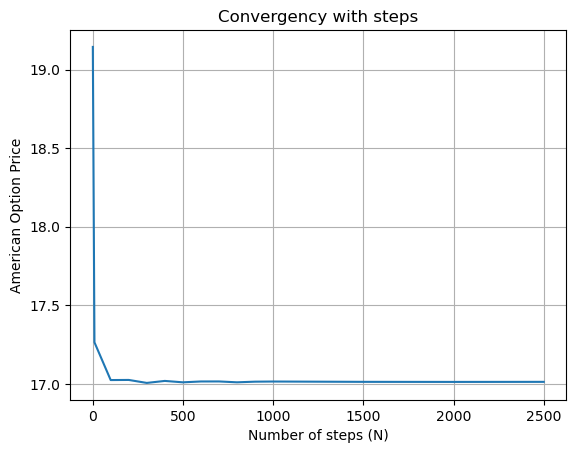

In [10]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Option Price")
plt.grid(True)
plt.show()

## Dynamic Delta Hedging

Delta measures how the option prices changes when underlying price moves.
The only change we can deal here that is different from Eurpean options is the payoff for the American options.
So, there will always be a trade-off between number of steps in the tree and dt (time-step) and the ability to continuously hedge our portfolio.

Let's add the code to calculate delta in our function american_options.

In [11]:
def american_options(S_ini, K, T, r, u, d, N, opttype):
    dt = T/N # Time step
    p = (np.exp(r * dt) - d) / (u - d) # risk-neutral prob
    C = np.zeros([N+1,N+1])
    S = np.zeros([N+1,N+1])
    Delta = np.zeros([N,N])

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j,i] = (C[j+1, i+1] - C[j+1,i]) / (
                S[j+1,i+1] - S[j+1,i]
            ) # Delta for each node
    return C[0,0], C, S, Delta

In [12]:
price, C, S, delta = american_options(45, 45, 5, 0, 1.2, 0.8333, 5, "C")

In [13]:
price

7.629120614012151

In [14]:
delta

array([[0.58474789, 0.        , 0.        , 0.        , 0.        ],
       [0.38354414, 0.75237745, 0.        , 0.        , 0.        ],
       [0.16223972, 0.56792023, 0.90605493, 0.        , 0.        ],
       [0.        , 0.29740705, 0.79329378, 1.        , 0.        ],
       [0.        , 0.        , 0.54518679, 1.        , 1.        ]])

### Delta Hedging for European Options

In [15]:
def european_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [16]:
price_euro, C_euro, S_euro, delta_euro = european_option(45, 45, 5, 0, 1.2, 0.8333, 5, "C")
delta_euro

array([[0.72579669, 0.        , 0.        , 0.        , 0.        ],
       [0.44672292, 0.83592034, 0.        , 0.        , 0.        ],
       [0.09194177, 0.58672101, 0.93425542, 0.        , 0.        ],
       [0.        , 0.12822237, 0.76764645, 1.        , 0.        ],
       [0.        , 0.        , 0.17881944, 1.        , 1.        ]])

In [19]:
price_euro

13.37283461304853

For American options, delta hedging is costlier compared to European ones.

So, in this notebook we understood evolution of underlying asset's price using Binomial Tree Model. We priced American options using BT. We saw how the value of the option prices behave as we increases the number of steps. Then we calculated dynamic delta at each nodes of the Binomial tree.